In [1]:
import numpy as np
import os
import sklearn
from matplotlib import pyplot as plt

/home/neriberman/miniconda3/envs/ground_shake/lib/python3.13/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [125]:
# data_folder_path = 'data/ANZA_hero_run_1982_M35/ANZA_hero_run_1982_M35'
data_folder_path = 'data/ANZA_WMC_1994_M55_test'

In [126]:
path = !pwd
results_folder = os.path.join(path[0], '../../', data_folder_path, 'data')
# List the fodlers in results_folder
folders_in_results = [f for f in os.listdir(results_folder) if os.path.isdir(os.path.join(results_folder, f))]
folders_in_results = np.sort(folders_in_results)

In [127]:
metadata_path = os.path.join(path[0], '../../', data_folder_path, 'metadata.npy')
metadata = np.load(metadata_path, allow_pickle=True)
metadata = metadata.item()

In [128]:
expected_signal_time = np.sum([float(v) for v in metadata['analysis_metadata'].values()])
expected_signal_time

np.float64(4441.0)

In [129]:
amplitudes = []
times = []
for folder_name in folders_in_results:
  this_example_folder = os.path.join(results_folder, folder_name)
  amplitude_path = os.path.join(this_example_folder, 'amplitude.npy')
  time_path = os.path.join(this_example_folder, 'times.npy')
  if os.path.exists(amplitude_path) and os.path.exists(time_path):
    amplitude = np.load(amplitude_path)
    time = np.load(time_path)
    if time.max() > expected_signal_time*0.9:
      amplitudes.append(amplitude)
      times.append(time)


In [130]:
metadata['analysis_metadata']

{'mid_buffer': 10,
 'forecast_time_window': 3600,
 'event_time_window': 30,
 'shift_times': True,
 'pre_buffer': 400.0,
 'post_buffer': 400.0}

In [140]:
metadata

{'earthquake_metadata': {'starttime': '1994-01-01',
  'endtime': '2023-01-01',
  'latitude_range': [32, 35],
  'longitude_range': [-117.5, -115.5],
  'minimum_magnitude': 5.5},
 'analysis_metadata': {'mid_buffer': 10,
  'forecast_time_window': 3600,
  'event_time_window': 30,
  'shift_times': True,
  'pre_buffer': 400.0,
  'post_buffer': 400.0},
 'station_metadata': {'stname': ['WMC'],
  'network': 'AZ',
  'org': 'IRIS',
  'latitude': 33.5519,
  'longitude': -116.6129,
  'start_time': '1982-10-01',
  'number_of_tries': 2}}

In [131]:
split_times = np.array([
  metadata['analysis_metadata']['pre_buffer'],
  metadata['analysis_metadata']['event_time_window'],
  metadata['analysis_metadata']['mid_buffer'],
  metadata['analysis_metadata']['forecast_time_window'],
  metadata['analysis_metadata']['post_buffer'],
  ])
split_times

array([ 400.,   30.,   10., 3600.,  400.])

In [132]:
split_times_cumsum = np.cumsum(split_times).astype(int)
split_times_cumsum

split_times_keys = [
  'pre_buffer_end',
  'event_time_window_end',
  'mid_buffer_end',
  'forecast_time_window_end',
  'post_buffer_end',
]
split_times_cumsum_dict = {k:int(v) for k,v in zip(split_times_keys, split_times_cumsum)}
split_times_cumsum_dict


{'pre_buffer_end': 400,
 'event_time_window_end': 430,
 'mid_buffer_end': 440,
 'forecast_time_window_end': 4040,
 'post_buffer_end': 4440}

In [133]:
# --- devide into pre and post
split_times_idx = [np.searchsorted(times[0], st) for st in split_times_cumsum]

In [136]:
times

[array([0.00000e+00, 1.00000e-02, 2.00000e-02, ..., 4.43998e+03,
        4.43999e+03, 4.44000e+03], shape=(444001,)),
 array([0.00000e+00, 1.00000e-02, 2.00000e-02, ..., 4.43998e+03,
        4.43999e+03, 4.44000e+03], shape=(444001,)),
 array([0.00000e+00, 1.00000e-02, 2.00000e-02, ..., 4.43998e+03,
        4.43999e+03, 4.44000e+03], shape=(444001,)),
 array([0.00000e+00, 1.00000e-02, 2.00000e-02, ..., 4.43998e+03,
        4.43999e+03, 4.44000e+03], shape=(444001,)),
 array([0.00000e+00, 1.00000e-02, 2.00000e-02, ..., 4.43998e+03,
        4.43999e+03, 4.44000e+03], shape=(444001,)),
 array([0.00000e+00, 1.00000e-02, 2.00000e-02, ..., 4.43998e+03,
        4.43999e+03, 4.44000e+03], shape=(444001,)),
 array([0.00000e+00, 1.00000e-02, 2.00000e-02, ..., 4.43997e+03,
        4.43998e+03, 4.43999e+03], shape=(444000,)),
 array([0.00000e+00, 1.00000e-02, 2.00000e-02, ..., 4.43997e+03,
        4.43998e+03, 4.43999e+03], shape=(444000,))]

In [135]:
len(amplitudes)

8

40000
43000
44000
404000
444000
40000
43000
44000
404000
444000
40000
43000
44000
404000
444000
40000
43000
44000
404000
444000
40000
43000
44000
404000
444000
40000
43000
44000
404000
444000
40000
43000
44000
404000
444000
40000
43000
44000
404000
444000


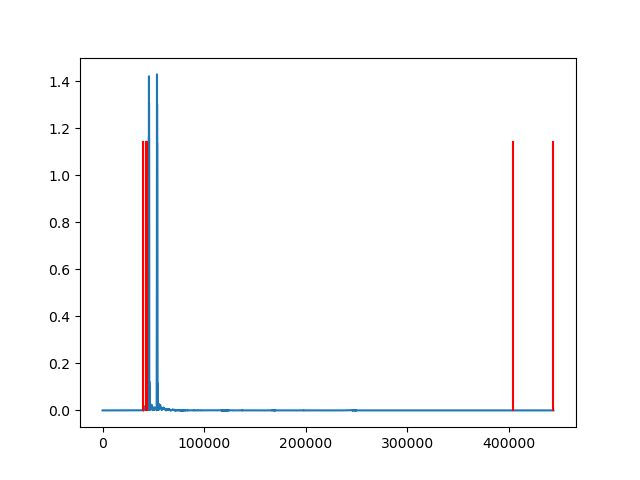

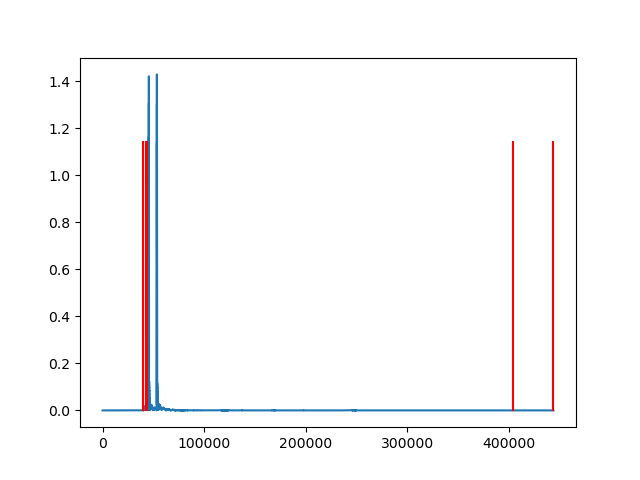

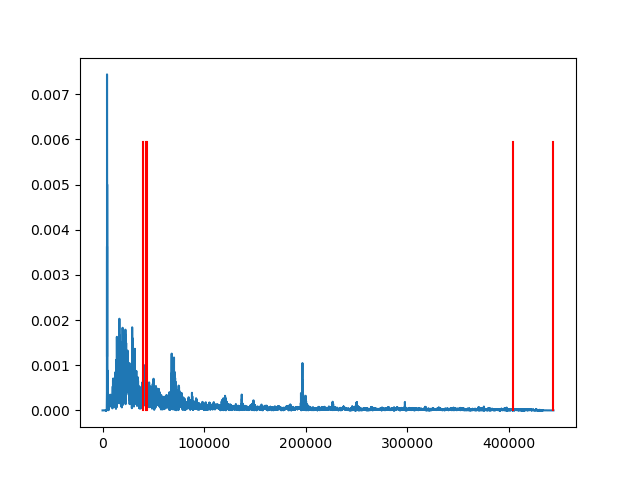

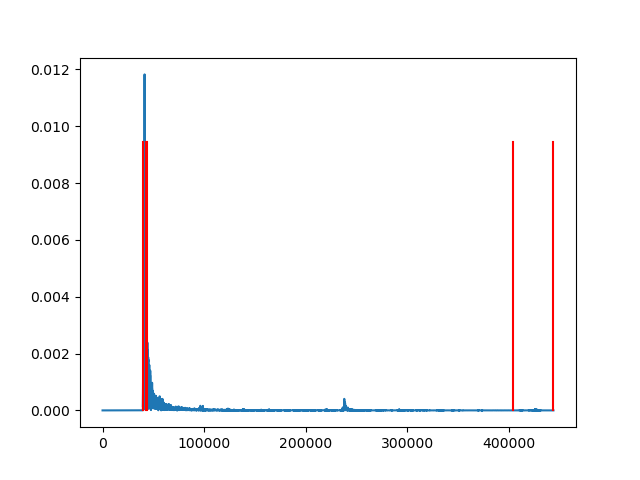

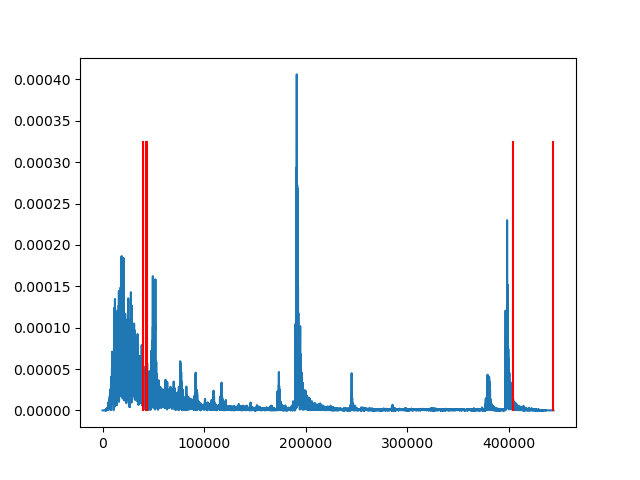

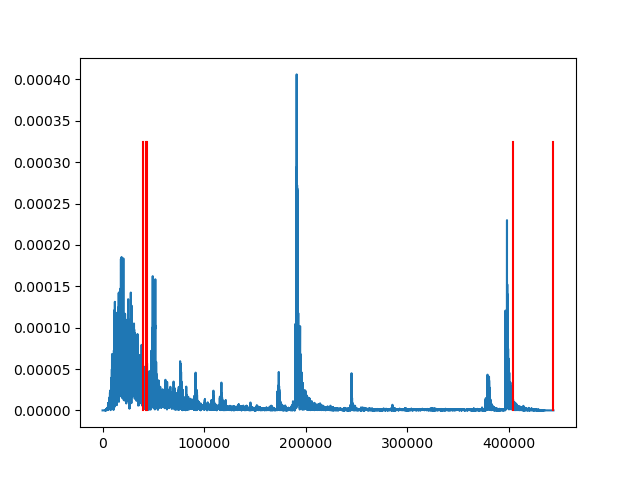

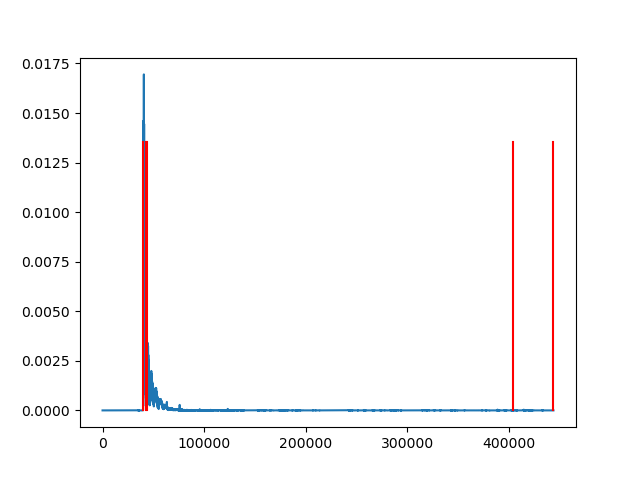

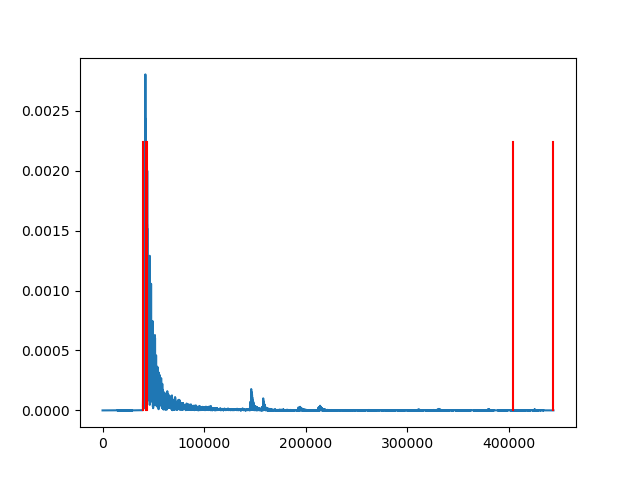

In [139]:
# IDX = 5
for IDX in range(len(amplitudes)):
  f = plt.figure()
  plt.plot(amplitudes[IDX])
  for idx in split_times_idx:
    print(idx)
    plt.plot([idx, idx], [0, amplitudes[IDX].max()*0.8], 'r')

In [120]:
pre_wave_list = []
post_wave_list = []
for a in amplitudes:
  pre_wave_list.append(a[
    split_times_cumsum_dict['pre_buffer_end']:split_times_cumsum_dict['event_time_window_end']
    ])
  post_wave_list.append(a[
    split_times_cumsum_dict['mid_buffer_end']:split_times_cumsum_dict['forecast_time_window_end']
    ])

In [ ]:
pre_matrix = np.array(pre_wave_list)
post_matrix = np.array(post_wave_list)

In [122]:
print(pre_matrix.shape)
print(post_matrix.shape)

(971, 30)
(971, 3600)


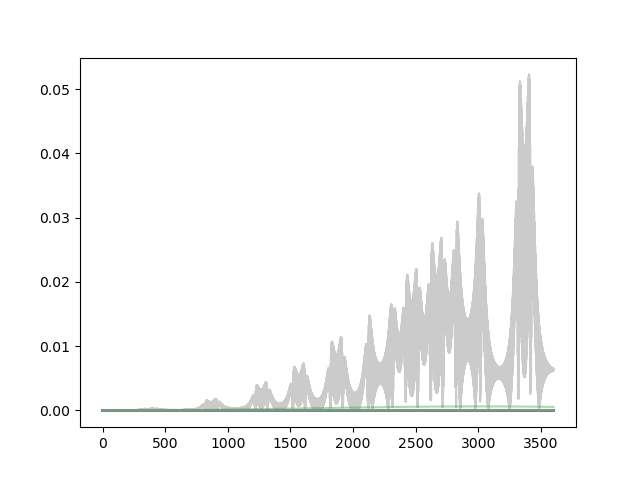

In [123]:
%matplotlib widget
f = plt.figure()
plt.plot(post_matrix[:30].T, alpha=0.4)


In [6]:
trim_len_pre = int(np.ceil(pre_matrix.shape[1] * 0.05))
trim_len_post = int(np.ceil(post_matrix.shape[1] * 0.05))

pre_matrix_trimmed = pre_matrix[:, trim_len_pre:-trim_len_pre]
post_matrix_trimmed = post_matrix[:, trim_len_post:-trim_len_post]

In [7]:
print(pre_matrix_trimmed.shape)
print(post_matrix_trimmed.shape)

(24, 2700)
(24, 324000)


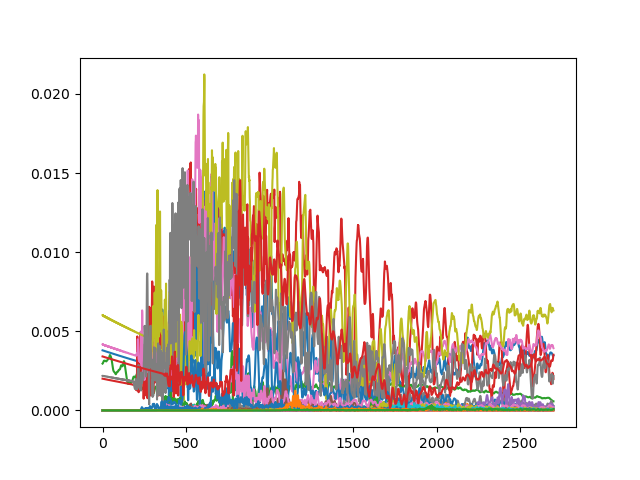

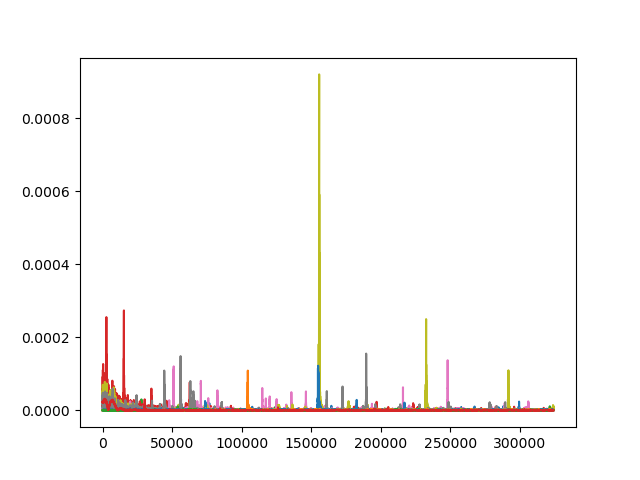

In [8]:
f = plt.figure()
plt.plot(pre_matrix_trimmed.T)
f = plt.figure()
plt.plot(post_matrix_trimmed.T)
# for pre_sig in pre_samples:
#   # plt.plot(pre_sig[380:420], alpha=0.5)
#   plt.plot(pre_sig, alpha=0.5)
#   # break
# f

In [9]:
inputs = pre_matrix_trimmed
outputs = np.max(post_matrix_trimmed, axis=1)

In [10]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
  inputs,
  outputs,
  test_size=0.5,
  shuffle=False,
  )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12, 2700)
(12, 2700)
(12,)
(12,)


## Plot the input data

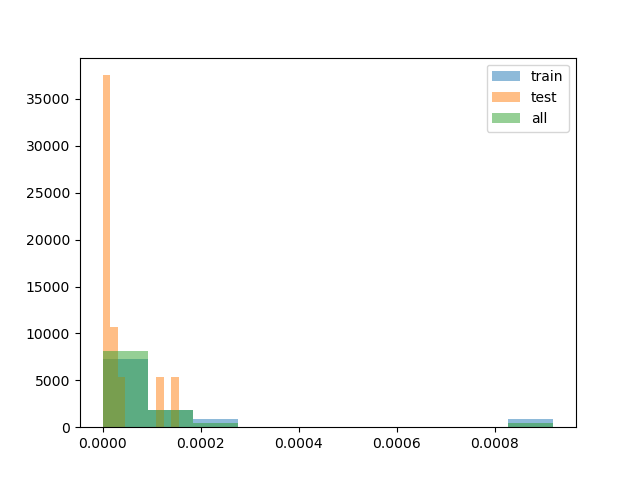

In [11]:
f = plt.figure()
plt.hist(y_train, density=True, label='train', alpha=0.5)
plt.hist(y_test, density=True, label='test', alpha=0.5)
plt.hist(np.concatenate([y_test, y_train], axis=0), density=True, label='all', alpha=0.5)
plt.legend()

In [12]:
lin_regressor = sklearn.linear_model.LinearRegression(
  fit_intercept=True,
  copy_X=True,
  positive=False
  )

In [13]:
lin_regressor.fit(X_train, y_train)
y_predicted = lin_regressor.predict(X_test)

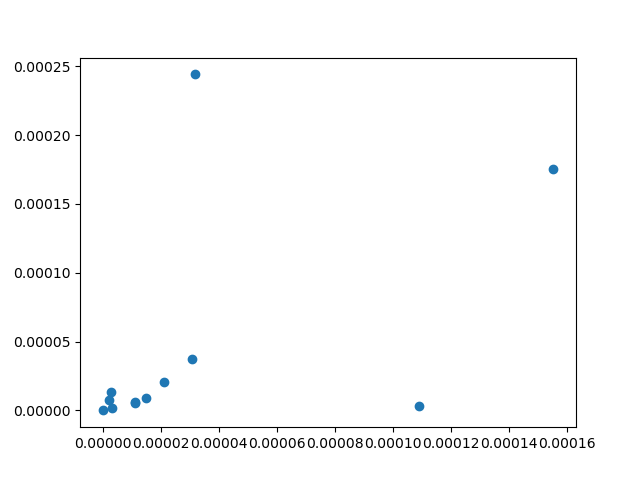

In [14]:
f = plt.figure()
plt.scatter(y_test, y_predicted)

# Now model with normalization

In [15]:
label_scaler = sklearn.preprocessing.MinMaxScaler()
label_scaler.fit(y_train.reshape(-1, 1))
y_train_scaled = label_scaler.transform(y_train.reshape(-1, 1))
y_test_scaled = label_scaler.transform(y_test.reshape(-1, 1))


In [16]:
# input_scaler = sklearn.preprocessing.StandardScaler()
input_scaler = sklearn.preprocessing.MinMaxScaler()
input_scaler.fit(X_train)
X_train_scaled = input_scaler.transform(X_train)
X_test_scaled = input_scaler.transform(X_test)

In [17]:
def add_amp_to_input(
    input,
    input_scaled,
):
  input_min = input.min(axis=1)
  input_max = input.max(axis=1)
  input_scaled_w_amp = np.concatenate([input_scaled, input_min.reshape(-1, 1), input_max.reshape(-1, 1)], axis=1)
  return input_scaled_w_amp

In [18]:
X_train_scaled_w_amp = add_amp_to_input(X_train, X_train_scaled)
print(X_train_scaled_w_amp.shape)
X_test_scaled_w_amp = add_amp_to_input(X_test, X_test_scaled)
print(X_test_scaled_w_amp.shape)

(12, 2702)
(12, 2702)


## Plot the input data

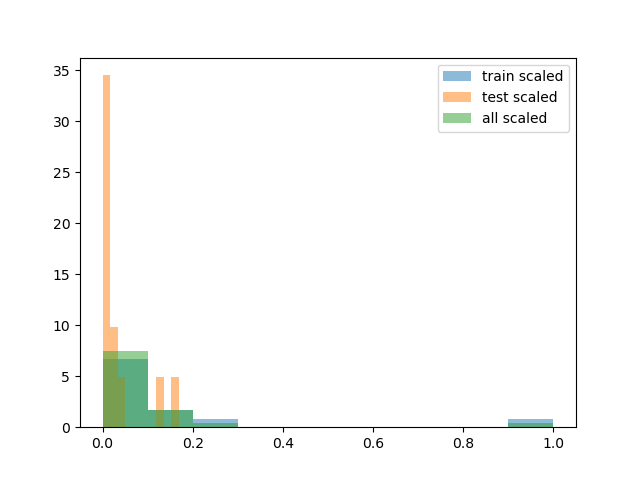

In [19]:
f = plt.figure()
plt.hist(y_train_scaled, density=True, label='train scaled', alpha=0.5)
plt.hist(y_test_scaled, density=True, label='test scaled', alpha=0.5)
plt.hist(np.concatenate([y_test_scaled, y_train_scaled], axis=0), density=True, label='all scaled', alpha=0.5)
plt.legend()

In [20]:
lin_regressor_for_scaled = sklearn.linear_model.LinearRegression(
  fit_intercept=True,
  copy_X=True,
  positive=False
  )

In [21]:
lin_regressor_for_scaled.fit(X_train_scaled_w_amp, y_train_scaled)
y_predicted_scaled = lin_regressor_for_scaled.predict(X_test_scaled_w_amp)
y_predicted = label_scaler.inverse_transform(y_predicted_scaled)

Text(0.5, 1.0, 'Predicted vs test PGV')

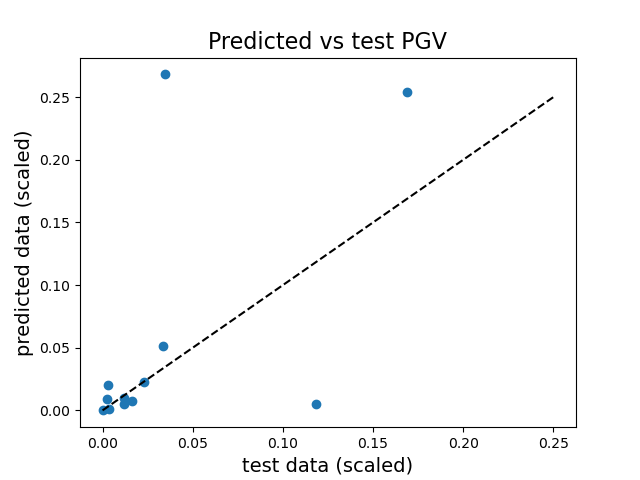

In [34]:
f = plt.figure()
plt.scatter(y_test_scaled, y_predicted_scaled)
plt.plot([0, 0.25], [0, 0.25], 'k--')
plt.xlabel('test data (scaled)', fontsize=14)
plt.ylabel('predicted data (scaled)', fontsize=14)
plt.title('Predicted vs test PGV', fontsize=16)

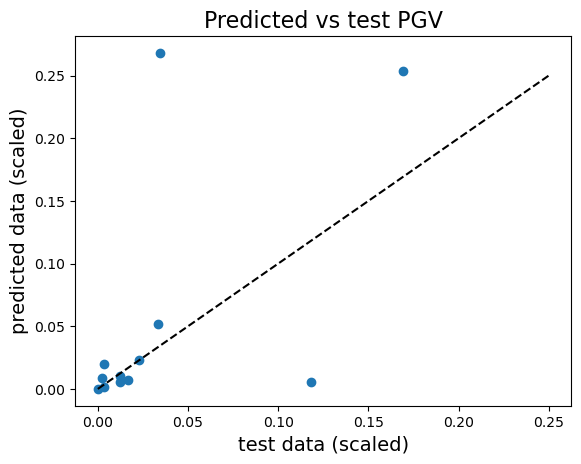

In [35]:
f

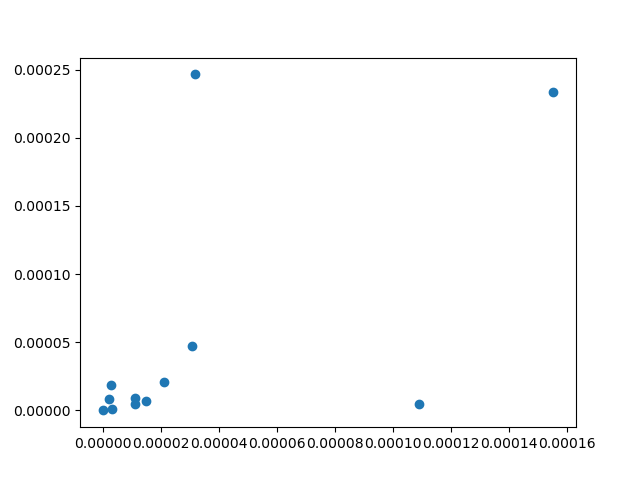

In [23]:
f = plt.figure()
plt.scatter(y_test, y_predicted)